In [164]:
import numpy as np
import pandas as pd
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix

from sklearn.linear_model import LinearRegression
#instital importent regrission model api

from sklearn import metrics
# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# Load data set

In [193]:
data = pd.read_csv("Credit.csv")
data.head(2)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


# Removing column

In [205]:
data = pd.read_csv('Credit.csv').drop('Unnamed: 0', axis=1).dropna()
data.head(2)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


In [204]:
#data = data[["Income","Limit","Rating","Cards","Age" ,"Education","Gender","Student","Married","Ethnicity","Balance"]]     
#data.head(2)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [201]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.
# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

#data[~data.applymap(np.isreal).all(1)]

In [202]:
# replace the missing values in pima_df with median value :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
data = data.fillna(data.median())
data.head(2)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


In [170]:
#Lets analysze the distribution of the various attributes  
#transpose() or we can write T
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


# converting to categarical to numarical variable


In [195]:
data_complete = pd.get_dummies(data,drop_first = True)
data_complete.head(2)

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,106.025,6645,483,3,82,15,903,1,1,1,1,0


# Explore the dataset
Is there in relashinship between dependent variables and spend various independent variables? Load matlplolib and seaborn for visuval analytics

C:\Users\Name\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Name\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


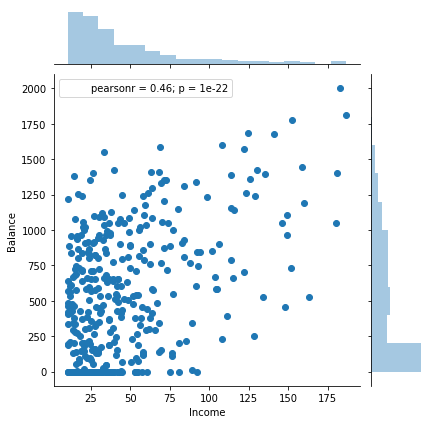

In [172]:
sns.jointplot(data_complete.Income,data_complete.Balance)

# Observe the graph: 
                   1.person correlation is 0.46 .
                   2.Observe the p value is 1e-22.
                   Here we are testing whethere correlation between income and balance is zero (Null hypothesis) or                                not(alternate hypothesis).since p value is insignificate,we reject the null hypothesis.

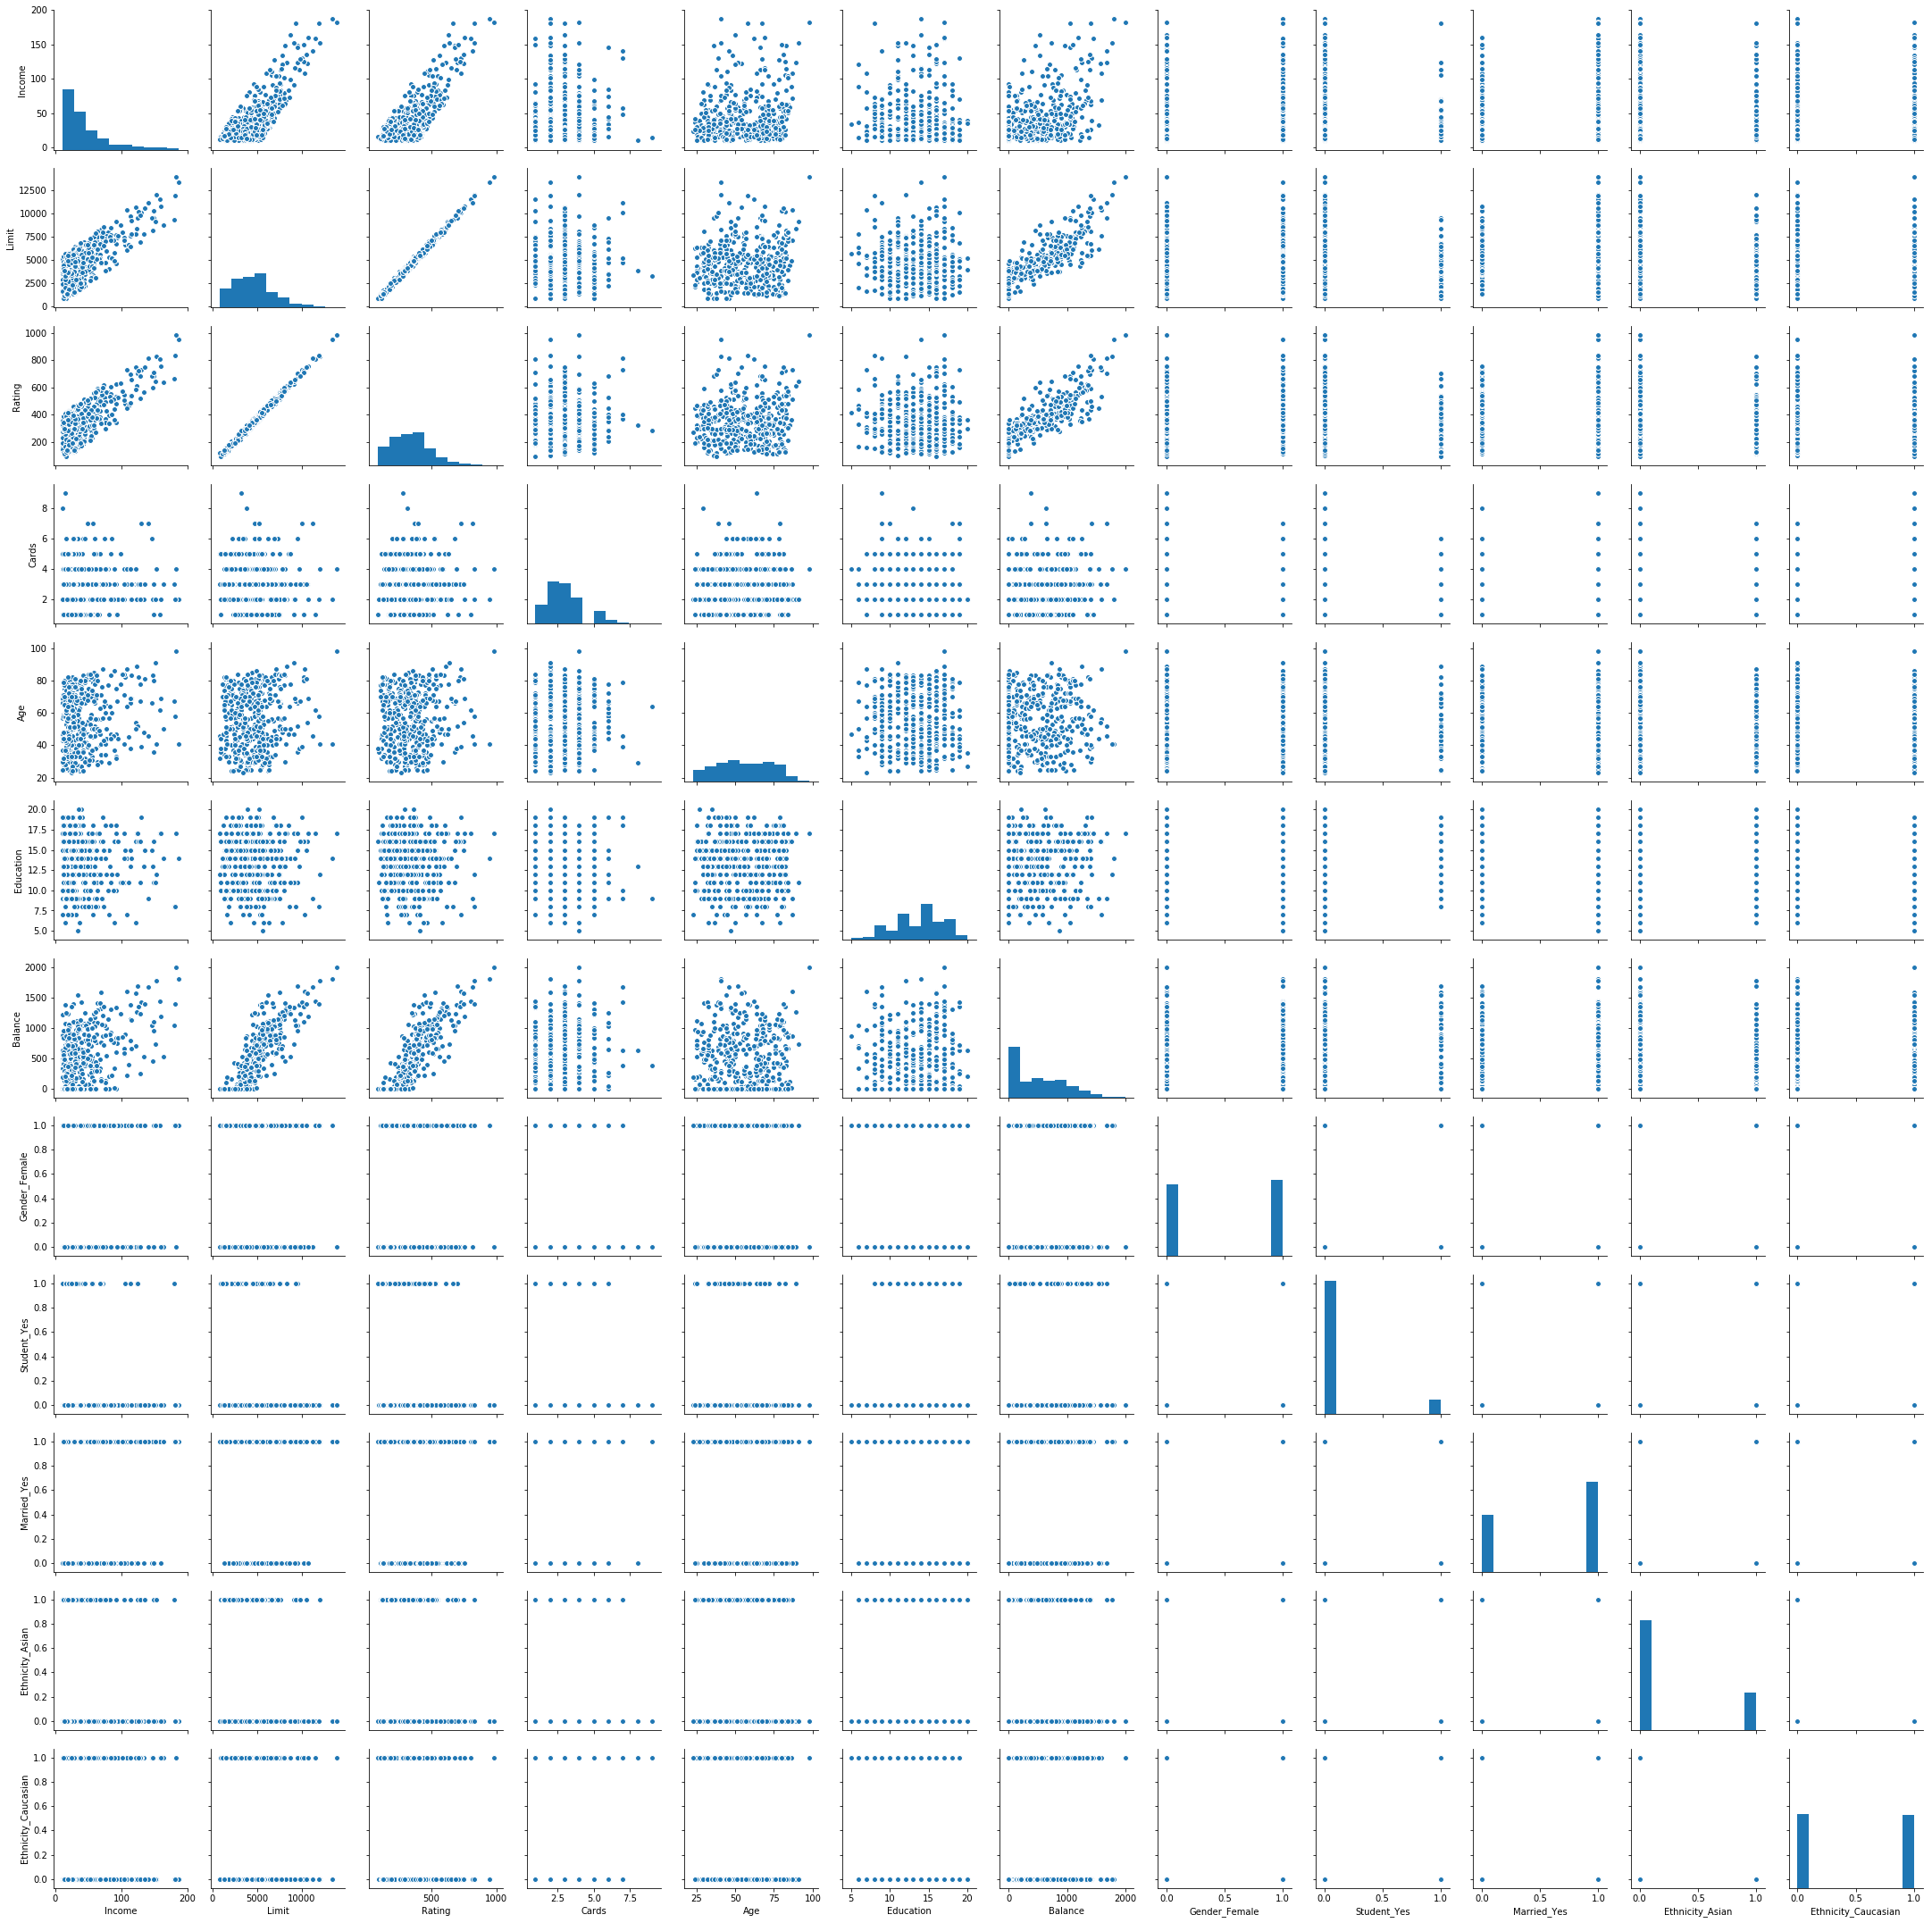

In [173]:
# Pairplot using sns

sns.pairplot(data_complete)

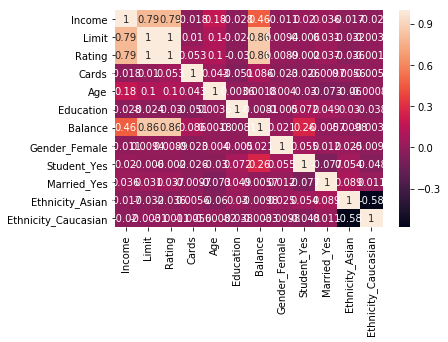

In [174]:
#sns.heatmap(data.corr(),annot=True)

sns.heatmap(data_complete.corr(),annot=True)


# Obsrevation:

1.The diagonal of the above matrix shows the auto_correlation of the variance .Its is always 1. We can observe that 
the correlation between income,range and balance is highest i.e 0.79.

2.Correlaton can be vary from -1 and +1 .Closer to +1 means strong positive correlation and close -1 means
strong negativve correlation . Closer to 0 means not very strong correlation . Variables with strong 
correlations are mostly probabily candidtes for the model bulding.    

In [175]:
data_complete.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance',
       'Gender_Female', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian',
       'Ethnicity_Caucasian'],
      dtype='object')

# separeting the data into train and test data and do analysis

In [176]:
x = data_complete[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', # independent variables
                   'Gender_Female', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian','Ethnicity_Caucasian']]
y = data_complete[['Balance']]# target variable or dependent variables

In [177]:
#help(train_test_split)

In [178]:
seed = 9
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = seed)

In [179]:
x_train.info()
#y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 258 to 382
Data columns (total 11 columns):
Income                 280 non-null float64
Limit                  280 non-null int64
Rating                 280 non-null int64
Cards                  280 non-null int64
Age                    280 non-null int64
Education              280 non-null int64
Gender_Female          280 non-null uint8
Student_Yes            280 non-null uint8
Married_Yes            280 non-null uint8
Ethnicity_Asian        280 non-null uint8
Ethnicity_Caucasian    280 non-null uint8
dtypes: float64(1), int64(5), uint8(5)
memory usage: 16.7 KB


# MODEL LINEAR REGRISSION

In [180]:
model = LinearRegression()

In [181]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [182]:
print("R^2:",model.score(x_train,y_train))
predictivebalance = model.predict(x_train)
mse = metrics.mean_squared_error(predictivebalance,y_train)#10-rmse,10+rmse
rmse = np.sqrt(mse)#+-3.24 pedictive sales-rmse+predictive sales
print("MSE:",mse)
print("RMSE_persentage:",rmse/np.mean(y_train.Balance)*100)


R^2: 0.9552936086675046
MSE: 9518.807335660122
RMSE_persentage: 18.626645867307705


In [183]:
print("R^2:",model.score(x_test,y_test))
predictivebalance = model.predict(x_test)
mse = metrics.mean_squared_error(predictivebalance,y_test)#10-rmse,10+rmse
rmse = np.sqrt(mse)#+-3.24 pedictive sales-rmse+predictive sales
print("MSE:",mse)
print("RMSE_persentage:",rmse/np.mean(y_test.Balance)*100)#errror persentage.
#rmse persentage


R^2: 0.9537107443346517
MSE: 9531.537048315335
RMSE_persentage: 19.097808991492464


# Adjusted R^2

In [184]:
def AdjRsquare(model,x,y):
    Rsquare = model.score(x,y)
    NoData = len(y)
    p = x.shape[1]
    tempRsquare = 1-(1-Rsquare)*(NoData-1)/(NoData-p-1)
    return tempRsquare

In [185]:
AdjRsquare(model,x_train,y_train)

0.9534586448441559

In [186]:
AdjRsquare(model,x_test,y_test)

0.9489960979242922

# combine the all the steps to test model performance

In [187]:
def linregcheckmodelPerformance(x,y):
    model = LinearRegression()
    seed = 9
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = seed)
    model.fit(x_train,y_train)
    # Train Accuracies
    trainR2 = model.score(x_train,y_train)
    predictivebalance = model.predict(x_train)
    mse = metrics.mean_squared_error(predictivebalance,y_train)#10-rmse,10+rmse
    trainRmse = np.sqrt(mse)#+-3.24 pedictive sales-rmse+predictive sale
    trainRmsePct = trainRmse/np.mean(np.mean(np.mean(y_train.Balance)))*100
    trianAdjR2 = AdjRsquare(model,x_train,y_train)
    trainAccuracies = [len(y_train),trainRmse,trainRmsePct,trainR2,trianAdjR2]
     # test Accuracies
    testR2 = model.score(x_test,y_test)
    predictivebalance = model.predict(x_test)
    mse = metrics.mean_squared_error(predictivebalance,y_test)#10-rmse,10+rmse
    testRmse = np.sqrt(mse)#+-3.24 pedictive sales-rmse+predictive sale
    testRmsePct = testRmse/np.mean(np.mean(np.mean(y_test.Balance)))*100
    testAdjR2 = AdjRsquare(model,x_test,y_test)
    testAccuracies = [len(y_test),testRmse,testRmsePct,testR2,testAdjR2]
    #cCreate dataframe foe result
    resultDf = pd.DataFrame(index=["Datasize","RMSE","RMSEPCT","R^2","ADJR^2"])
    resultDf['Train_Data'] = trainAccuracies
    resultDf['Test_Data'] = testAccuracies
    return(round(resultDf,4))

In [188]:
linregcheckmodelPerformance(x,y)

,Train_Data,Test_Data
Datasize,280.0000,120.0000
RMSE,97.5644,97.6296
RMSEPCT,18.6266,19.0978
R^2,0.9553,0.9537
ADJR^2,0.9535,0.9490


In [189]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = data_complete[['Income','Limit','Cards', 'Age', 'Education',
       'Gender_Female', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian',
       'Ethnicity_Caucasian']]# we need to remove categarical variabel
#VIF Factor
def myVIFfun(x):
    data_mat = x.as_matrix()
    vif = [variance_inflation_factor(data_mat,i)
            for i in range(data_mat.shape[1])]
    vif_factor = pd.DataFrame()
    vif_factor["Balance"] = x.columns#list(x.columns)
    vif_factor["vif"] = vif
    return vif_factor 
myVIFfun(x)    

C:\Users\Name\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,Balance,vif
0,Income,7.234320
1,Limit,13.133486
2,Cards,5.090848
3,Age,9.339359
4,Education,11.477451
5,Gender_Female,2.039122
6,Student_Yes,1.134818
7,Married_Yes,2.598013
8,Ethnicity_Asian,1.968732
9,Ethnicity_Caucasian,2.813713


In [190]:
linregcheckmodelPerformance(x,y)

,Train_Data,Test_Data
Datasize,280.0000,120.0000
RMSE,97.9673,98.7308
RMSEPCT,18.7036,19.3132
R^2,0.9549,0.9527
ADJR^2,0.9532,0.9483
